In [259]:
import pandas as pd

df1 = pd.read_csv('/content/Housing (1).csv')
df2 = pd.read_csv('/content/data.csv')
df3 = pd.read_csv('/content/wine_data.csv')
df4 = pd.read_csv('/content/MASTER_PhonesmartdataAll_CCI_AdvStats.csv')

In [157]:
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#**Housing Dataset**

##Dataset Type: Linear, Single label, as the target variable is likely the price, which is a single continuous variable.

**Possible Tasks on the Dataset:** Given the nature of the price variable (a continuous numerical value), the primary task for this dataset is likely Regression, where we aim to predict the price of a house based on various features.

Price (Target Variable):
Type: Continuous, Numeric

Area:
Type: Continuous, Numeric

Bedrooms:
Type: Discrete, Numeric

Mainroad:
Type: Categorical, Binary (Yes/No)

Furnishingstatus:

Type: Categorical, Non-Binary (e.g., furnished, semi-furnished, unfurnished) etc.

##**b. Any one exploratory technique**

In [ ]:
# Exploratory technique: Descriptive statistics
df1.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


##**c. Inferential Analysis Techniques**


<ipython-input-4-1a225b3fe6b7>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')


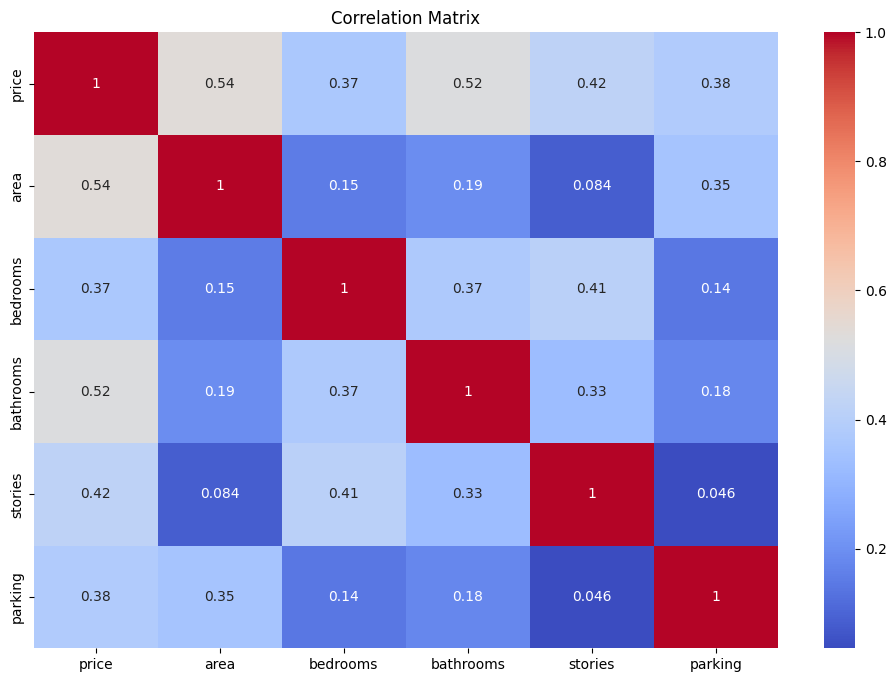

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##**d. Any one Predictive Analysis Technique**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df1.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Copying the original dataset to avoid modifying it directly
df1_prep = df1.copy()

# Initializing a label encoder
label_encoder = LabelEncoder()

# List of categorical columns to be encoded
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Encoding each categorical column
for column in categorical_columns:
    df1_prep[column] = label_encoder.fit_transform(df1_prep[column])

# Displaying the first few rows of the preprocessed data
print(df1_prep.head())


      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import numpy as np


X = df1_prep.drop('price', axis=1)
y = df1_prep['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for training data
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

# Calculate metrics for test data
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

# Print the results
print("Training R2:", train_r2, "Training RMSE:", train_rmse)
print("Test R2:", test_r2, "Test RMSE:", test_rmse)


Training R2: 0.6927795109061217 Training RMSE: 982422.094371189
Test R2: 0.6435419628959105 Test RMSE: 1238970.4429194632


#**LOSS FUNCTION APPLICATION**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate L1 loss (Mean Absolute Error) for training data
train_l1 = mean_absolute_error(y_train, y_train_pred)

# Calculate L1 loss (Mean Absolute Error) for test data
test_l1 = mean_absolute_error(y_test, y_test_pred)

# L2 loss (Mean Squared Error) is already calculated as 'train_mse' and 'test_mse'
# Here we just assign it to the variables for clarity
train_l2 = train_mse
test_l2 = test_mse

# Print the results
print(f"Training L1 Loss (MAE): {train_l1}")
print(f"Test L1 Loss (MAE): {test_l1}")
print(f"Training L2 Loss (MSE): {train_l2}")
print(f"Test L2 Loss (MSE): {test_l2}")

Training L1 Loss (MAE): 719440.7398749229
Test L1 Loss (MAE): 925543.5483156566
Training L2 Loss (MSE): 965153171508.6733
Test L2 Loss (MSE): 1535047758428.0508


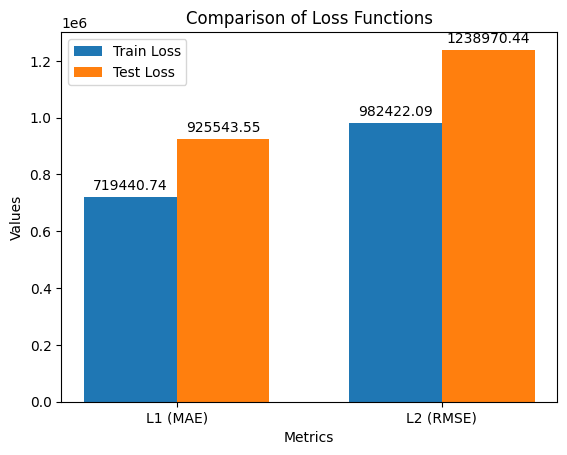

In [ ]:
# Calculate RMSE for better scale comparison with MAE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Plotting
fig, ax = plt.subplots()

# Set the bar width
bar_width = 0.35

# Set the position of the bars on the x-axis
indices = np.arange(2)

# Plotting both training and test metrics
train_bars = ax.bar(indices, [train_l1, train_rmse], bar_width, label='Train Loss')
test_bars = ax.bar(indices + bar_width, [test_l1, test_rmse], bar_width, label='Test Loss')

# Adding the names for each metric
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Loss Functions')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(['L1 (MAE)', 'L2 (RMSE)'])
ax.legend()

# Adding the actual values on top of the bars for clarity
for bar in train_bars + test_bars:
    height = bar.get_height()
    ax.annotate('{}'.format(round(height, 2)),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

##**Music Dataset**

Upon inspecting the dataset and considering the domain of audio and music analysis, here's a report on the types of variables based on their characteristics and relevance in the context:

Filename:
Type: Categorical, Textual

Tempo:
Type: Continuous, Numeric

Beats:
Type: Discrete, Numeric

Chroma STFT:
Type: Continuous, Numeric
Context: Short-time Fourier Transform applied to chroma feature. It's a sound processing technique used to analyze the spectral content of audio signals.

RMSE (Root Mean Square Energy):
Type: Continuous, Numeric
Context: Indicates the square root of the average of squared values of the signal.


Spectral Features (Spectral Centroid, Spectral Bandwidth, Rolloff):
Type: Continuous, Numeric
Context: These features describe properties of the spectrum of the sound signal (like center of mass, width, and rolloff point).

Zero Crossing Rate:
Type: Continuous, Numeric
Context: The rate at which the signal changes sign.

MFCCs (Mel-frequency Cepstral Coefficients):
Type: Continuous, Numeric
Context: A set of features (mfcc1, mfcc2, ..., mfcc20) that comprehensively describe the overall shape of a spectral envelope.

Label:
Type: Categorical, Textual (Genre)
Context: The genre of the music track.

##**Type of Dataset**
**Non-Linear:** The relationship between features and labels in audio data is often complex and non-linear, suggesting a non-linear model for this data.

**Multi-class label** This appears to be a Multi-class label classification problem, where each instance (a piece of music) is classified into a class of genre.

##**Loss Function:**
Log loss

##**b. Any one exploratory analysis technique**

<Axes: xlabel='tempo', ylabel='Count'>

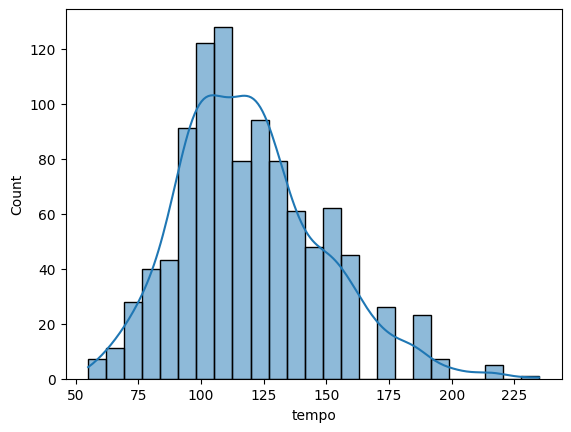

In [ ]:
sns.histplot(df2['tempo'], kde=True)

## **c. Any one Inferential analysis technique**
##  ANOVA (Analysis of Variance)

In [ ]:
df2['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [ ]:
import scipy.stats as stats

# One Way Anova to check if tempo significantly differs across music genre
stats.f_oneway(df2[df2['label'] == 'blues']['tempo'],
               df2[df2['label'] == 'classical']['tempo'],
               df2[df2['label'] == 'country']['tempo'],
               df2[df2['label'] == 'disco']['tempo'],
               df2[df2['label'] == 'hiphop']['tempo'],
               df2[df2['label'] == 'jazz']['tempo'],
               df2[df2['label'] == 'metal']['tempo'],
               df2[df2['label'] == 'pop']['tempo'],
               df2[df2['label'] == 'reggae']['tempo'],
               df2[df2['label'] == 'rock']['tempo'])

F_onewayResult(statistic=5.249430517606303, pvalue=5.264091590285547e-07)

## **d. Any one predicative analysis technique**
##**Random Forest Classifier**

In [ ]:
# Data Preprocessing
df2.isnull().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [ ]:
# Copying the original dataset to avoid modifying it directly
new_df2 = df2.copy()
new_df2

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


In [ ]:
# List of categorical columns to be encoded
categorical_columns = ['label']

# Encoding categorical column
for column in categorical_columns:
    new_df2[column] = label_encoder.fit_transform(new_df2[column])

# Displaying the first few rows of the preprocessed data
print(new_df2.head())
new_df2['label'].unique()

         filename       tempo  beats  chroma_stft      rmse  \
0  blues.00081.au  103.359375     50     0.380260  0.248262   
1  blues.00022.au   95.703125     44     0.306451  0.113475   
2  blues.00031.au  151.999081     75     0.253487  0.151571   
3  blues.00012.au  184.570312     91     0.269320  0.119072   
4  blues.00056.au  161.499023     74     0.391059  0.137728   

   spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0        2116.942959         1956.611056  4196.107960            0.127272   
1        1156.070496         1497.668176  2170.053545            0.058613   
2        1331.073970         1973.643437  2900.174130            0.042967   
3        1361.045467         1567.804596  2739.625101            0.069124   
4        1811.076084         2052.332563  3927.809582            0.075480   

        mfcc1  ...     mfcc12     mfcc13    mfcc14    mfcc15    mfcc16  \
0  -26.929785  ...  14.336612 -13.821769  7.562789 -6.181372  0.330165   
1 -233.860

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Step 3: Split the dataset
X = new_df2.drop(['label', 'filename'], axis=1)  # Features
y = new_df2['label']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.61

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.71      0.74        35
           1       0.69      1.00      0.82        20
           2       0.54      0.57      0.55        37
           3       0.76      0.47      0.58        34
           4       0.43      0.50      0.46        24
           5       0.76      0.67      0.71        33
           6       0.73      0.90      0.81        30
           7       0.50      0.74      0.60        23
           8       0.50      0.38      0.43        29
           9       0.43      0.34      0.38        35

    accuracy                           0.61       300
   macro avg       0.61      0.63      0.61       300
weighted avg       0.61      0.61      0.60       300



## **LOSS FUNCTION**
## Log Loss

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, log_loss

# Get probability predictions for the test dataset and calculate log loss
prob_predictions = model.predict_proba(X_test)
log_loss_value = log_loss(y_test, prob_predictions)

# Print log loss
print("\nLog Loss:", log_loss_value)


Log Loss: 1.1925010587910485


##**WINE DATASET**

## **Dataset Type**
Type: Non-Linear. The relationships between chemical properties (features) and wine classes (targets) are  non-linear.

Multi-class classification. This is a multi-label classification data.

Justification Based on Evidence:
a. Inspect and Report:
The variables represent physicochemical properties like alcohol content, acidity levels, etc., which are continuous and can influence the classification in complex ways.
With 59, 71, and 48 samples per class, the dataset is fairly balanced, which is beneficial for classification tasks (scikit Learn. n.d).

## Loss Function: Categorical Cross Entropy

## **b. Exploratory Analysis Technique**

In [202]:
newdf3 = df3.copy()

In [203]:
newdf3

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [204]:
 newdf3 = newdf3.loc[:, ~newdf3.columns.str.contains('^Unnamed')]

In [205]:
newdf3

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [206]:
# Assign class labels
newdf3['class'] = 0  # Initialize the column with a default class

# Class 0 will have 59 entries, class 1 will have 71, and class 2 will have 48
newdf3.iloc[:59, newdf3.columns.get_loc('class')] = 0
newdf3.iloc[59:59+71, newdf3.columns.get_loc('class')] = 1
newdf3.iloc[59+71:, newdf3.columns.get_loc('class')] = 2

# Check the distribution of the new class labels
print(newdf3['class'].value_counts())


1    71
0    59
2    48
Name: class, dtype: int64


In [207]:
newdf3

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [208]:
newdf3.groupby('class').describe()

alcohol                                                             \
        count       mean       std    min     25%     50%     75%    max   
class                                                                      
0        59.0  13.744746  0.462125  12.85  13.400  13.750  14.100  14.83   
1        71.0  12.278732  0.537964  11.03  11.915  12.290  12.515  13.86   
2        48.0  13.153750  0.530241  12.20  12.805  13.165  13.505  14.34   

      malic_acid            ... od280/od315_of_diluted_wines       proline  \
           count      mean  ...                          75%   max   count   
class                       ...                                              
0           59.0  2.010678  ...                         3.42  4.00    59.0   
1           71.0  1.932676  ...                         3.16  3.69    71.0   
2           48.0  3.333750  ...                         1.82  2.47    48.0   

                                                                      
              mean         std    min    25%     50%     75%     max  
class                                                                 
0      1115.711864  221.520767  680.0  987.5  1095.0  1280.0  1680.0  
1       519.507042  157.211220  278.0  406.5   495.0   625.0   985.0  
2       629.895833  115.097043  415.0  545.0   627.5   695.0   880.0  

[3 rows x 104 columns]

<Axes: xlabel='class', ylabel='alcohol'>

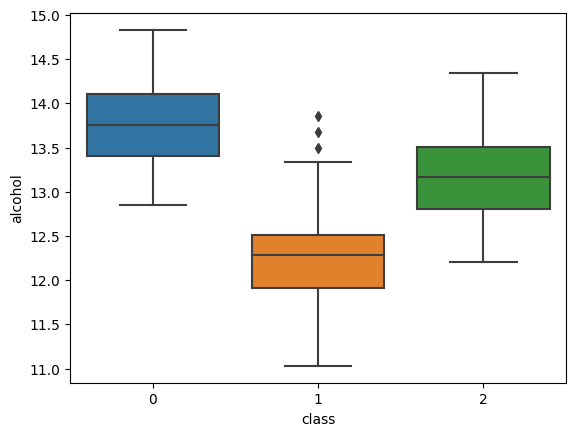

In [209]:
# Box plots for each alcohol feature within each class to understand the distribution and identify any outliers
sns.boxplot(x='class', y='alcohol', data=newdf3)

## **c. Inferential Analysis Technique**


In [210]:
import scipy.stats as stats

# ANOVA (Analysis of Variance):
f_value, p_value = stats.f_oneway(newdf3['alcohol'][newdf3['class'] == 0],
                                  newdf3['alcohol'][newdf3['class'] == 1],
                                  newdf3['alcohol'][newdf3['class'] == 2])
print(f_value, p_value)

135.07762424279912 3.319503795619655e-36


##** d. Predictive Analysis Technique**
## Multinomial Logistic Regression

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss

from sklearn.utils import shuffle

# Shuffle the dataset
newdf3 = shuffle(newdf3, random_state=42)


# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode the target variable for log loss calculation
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression with a higher number of iterations
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)

# Train the model with the scaled data
model.fit(X_train_scaled, y_train)

# Predict probabilities with the scaled test data
prob_predictions = model.predict_proba(X_test_scaled)

# Calculate log loss (categorical cross-entropy)
log_loss_value = log_loss(y_test_onehot, prob_predictions)

print("Categorical Cross-Entropy Loss:", log_loss_value)

Categorical Cross-Entropy Loss: 0.060202037126245896


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [198]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


IndexError: ignored

##**MASTER PHONESMART DATA**

##**Dataset Type**


##a. Type:

The dataset appears to be both Linear and Non-Linear because it likely contains complex relationships among the features.

The task is Single-Label or Multi-Class Classification if the goal is to predict a categorical variable from the given features, or Regression if predicting a continuous variable.

##b. Tasks:
Classification: If a categorical variable needs to be predicted, such as the type of device based on the user's demographic and usage data.

Regression: If a continuous variable, such as the Autism Quotient or STAI, needs to be predicted based on other features.

##a. Inspect and Report:

Age, AutismQuotient, STAI, BRIEF_Total, DailyAvgMins, DailyAvePickups, VS_RT_correct_Conjunction, VS_RT_correct_Single: Continuous numerical variables that could be used as features or targets for Regression.

Year, GenderNum, Device: Categorical variables that could be used as features; if 'Device' is the target, the task is Classification.

##** a. Exploratory Analysis Techniques**
## Before that, we preprocess the data

In [ ]:
df4

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
0,2022,,2,4,49,70,,,,1178.700000,1216.387500
1,2021,37,2,8,44,33,,,,946.470000,785.597500
2,2022,,1,,,,,,,1182.741667,950.900000
3,2022,,1,,,,,,,1778.950000,984.333333
4,2022,,2,,,,,,,521.500000,503.000000
...,...,...,...,...,...,...,...,...,...,...,...
543,2020,38,1,3,56,39,iPhone,507,,915.785917,747.883194
544,2020,27,2,5,64,77,iPhone,267,,877.783333,720.729583
545,2020,36,2,2,46,43,iPhone,610,,1211.483333,1049.979167
546,2020,31,2,4,67,69,iPhone,558,,899.774583,845.612083


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       548 non-null    int64  
 1   Age                        548 non-null    object 
 2   GenderNum                  548 non-null    object 
 3   AutismQuotient             548 non-null    object 
 4   STAI                       548 non-null    object 
 5   BRIEF_Total                548 non-null    object 
 6   Device                     548 non-null    object 
 7   DailyAvgMins               548 non-null    object 
 8   DailyAvePickups            548 non-null    object 
 9   VS_RT_correct_Conjunction  548 non-null    float64
 10  VS_RT_correct_Single       548 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 47.2+ KB


In [ ]:
newdf = df4.convert_dtypes()
print("New_dtypes:")
print(newdf.dtypes)

New_dtypes:
Year                           Int64
Age                           string
GenderNum                     string
AutismQuotient                string
STAI                          string
BRIEF_Total                   string
Device                        string
DailyAvgMins                  string
DailyAvePickups               string
VS_RT_correct_Conjunction    Float64
VS_RT_correct_Single         Float64
dtype: object


In [ ]:
# Replace empty strings or spaces with NaN
df4.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Recheck for missing values
missing_values_updated = df4.isnull().sum()
print(missing_values_updated)

Year                           0
Age                           25
GenderNum                     10
AutismQuotient                 6
STAI                           9
BRIEF_Total                    7
Device                       154
DailyAvgMins                 183
DailyAvePickups              417
VS_RT_correct_Conjunction      0
VS_RT_correct_Single           0
dtype: int64


In [ ]:
df4

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
0,2022,NaN,2,4,49,70,NaN,NaN,NaN,1178.700000,1216.387500
1,2021,37,2,8,44,33,NaN,NaN,NaN,946.470000,785.597500
2,2022,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1182.741667,950.900000
3,2022,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1778.950000,984.333333
4,2022,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,521.500000,503.000000
...,...,...,...,...,...,...,...,...,...,...,...
543,2020,38,1,3,56,39,iPhone,507,NaN,915.785917,747.883194
544,2020,27,2,5,64,77,iPhone,267,NaN,877.783333,720.729583
545,2020,36,2,2,46,43,iPhone,610,NaN,1211.483333,1049.979167
546,2020,31,2,4,67,69,iPhone,558,NaN,899.774583,845.612083


In [ ]:
# List of float columns you want to convert to nullable integers
columns_to_convert = ['Age', 'GenderNum', 'AutismQuotient', 'STAI', 'BRIEF_Total', 'DailyAvgMins', 'DailyAvePickups']

# Convert each column to nullable integer type
for column in columns_to_convert:
    df4[column] = df4[column].astype('Int64')

df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       548 non-null    int64  
 1   Age                        523 non-null    Int64  
 2   GenderNum                  538 non-null    Int64  
 3   AutismQuotient             542 non-null    Int64  
 4   STAI                       539 non-null    Int64  
 5   BRIEF_Total                541 non-null    Int64  
 6   Device                     394 non-null    object 
 7   DailyAvgMins               365 non-null    Int64  
 8   DailyAvePickups            131 non-null    Int64  
 9   VS_RT_correct_Conjunction  548 non-null    float64
 10  VS_RT_correct_Single       548 non-null    float64
dtypes: Int64(7), float64(2), int64(1), object(1)
memory usage: 51.0+ KB


In [ ]:
# Get the descriptive statistics
df4.describe()

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
count,548.000000,523.0,538.0,542.0,539.0,541.0,365.0,131.0,548.000000,548.000000
mean,2020.711679,30.330784,1.791822,3.238007,47.42115,51.049908,272.879452,104.763359,942.567275,841.467643
std,0.731187,8.502397,0.433005,1.746556,11.564704,24.936722,149.404392,41.183236,195.525323,172.026277
min,2020.000000,16.0,1.0,0.0,20.0,0.0,0.0,32.0,521.500000,503.000000
25%,2020.000000,25.0,2.0,2.0,39.0,33.0,170.0,76.0,823.408271,730.852768
50%,2021.000000,29.0,2.0,3.0,47.0,50.0,245.0,100.0,903.227792,796.977778
75%,2021.000000,34.0,2.0,4.0,55.0,67.0,348.0,123.5,1012.179167,886.148194
max,2022.000000,101.0,3.0,10.0,77.0,140.0,1157.0,272.0,2125.150000,1896.975000


In [ ]:
#Replace numeric missing value with the minimum values using 'fiilna' method
# 'Age', 'GenderNum', 'AutismQuotient', 'STAI', 'BRIEF_Total', 'DailyAvgMins', 'DailyAvePickups'
df4['Age'] = df4['Age'].fillna(16)
df4['GenderNum'] = df4['GenderNum'].fillna(1)
df4['AutismQuotient'] = df4['AutismQuotient'].fillna(0)
df4['STAI'] = df4['STAI'].fillna(20)
df4['BRIEF_Total'] = df4['BRIEF_Total'].fillna(0)
df4['DailyAvgMins'] = df4['DailyAvgMins'].fillna(0)
df4['DailyAvePickups'] = df4['DailyAvePickups'].fillna(32)
df4['GenderNum'] = df4['GenderNum'].fillna(1)

In [ ]:
# Imputing the most frequent value for Device
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df4['Device'] = imputer.fit_transform(df4[['Device']])

In [ ]:
df4.isnull().sum()

Year                         0
Age                          0
GenderNum                    0
AutismQuotient               0
STAI                         0
BRIEF_Total                  0
Device                       0
DailyAvgMins                 0
DailyAvePickups              0
VS_RT_correct_Conjunction    0
VS_RT_correct_Single         0
dtype: int64

In [ ]:
df4.dropna(inplace=True)

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       548 non-null    int64  
 1   Age                        548 non-null    Int64  
 2   GenderNum                  548 non-null    Int64  
 3   AutismQuotient             548 non-null    Int64  
 4   STAI                       548 non-null    Int64  
 5   BRIEF_Total                548 non-null    Int64  
 6   Device                     548 non-null    object 
 7   DailyAvgMins               548 non-null    Int64  
 8   DailyAvePickups            548 non-null    Int64  
 9   VS_RT_correct_Conjunction  548 non-null    float64
 10  VS_RT_correct_Single       548 non-null    float64
dtypes: Int64(7), float64(2), int64(1), object(1)
memory usage: 51.0+ KB


##** b. Exploratory Analysis Technique**

<Axes: xlabel='Device', ylabel='count'>

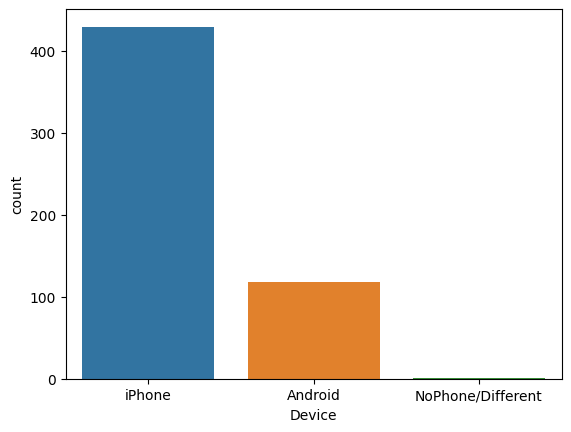

In [ ]:
sns.countplot(data=df4, x='Device')

##**c. Any Inferential Analysis Technique**
##Chi-square

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table for 'GenderNum' and 'Device'
contingency_table = pd.crosstab(df4['GenderNum'], df4['Device'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square statistic: {chi2}')
print(f'P-value: {p_value}')


Chi-Square statistic: 14.466866399979429
P-value: 0.005944849196853516


##**d. Any one Predictive Analysis Technique**
##Random Model Classifier

In [ ]:
# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Encode categorical variables using LabelEncoder
encoder = LabelEncoder()
df4['Device'] = encoder.fit_transform(df4['Device'])

In [ ]:
# Scale the numerical features to standardize them
scaler = StandardScaler()
numerical_features = df4.drop(['Year', 'Device'], axis=1)  # Replace with your numerical features columns
scaled_features = scaler.fit_transform(numerical_features)


In [ ]:
# Define your features and target variable
X = scaled_features  # Features
y = df4['Device']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict the target variable for the test set
y_pred = rf_classifier.predict(X_test)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2])

In [ ]:
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.7818181818181819
Precision: 0.48504273504273504
Recall: 0.37802840434419377
F1 Score: 0.375886524822695
Confusion Matrix:
[[  6   0  32]
 [  0   0   1]
 [  3   0 123]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**5. KERNEL TRANSFORMATION OF WINE DATA**

In [227]:
new_df4 = df3.copy()
new_df4

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [228]:
# Remove first column(Unnamed)
new_df4 = new_df4.loc[:, ~new_df4.columns.str.contains('^Unnamed')]

In [229]:
new_df4

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [231]:
# Assign class labels
new_df4['class'] = 0  # Initialize the column with a default class

# Class 0 will have 59 entries, class 1 will have 71, and class 2 will have 48
new_df4.iloc[:59, new_df4.columns.get_loc('class')] = 0
new_df4.iloc[59:59+71, new_df4.columns.get_loc('class')] = 1
new_df4.iloc[59+71:, new_df4.columns.get_loc('class')] = 2

# Check the distribution of the new class labels
print(new_df4['class'].value_counts())


1    71
0    59
2    48
Name: class, dtype: int64


In [232]:
new_df4

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [234]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# Separating features and target variable
X = new_df4.drop('class', axis=1)
y = new_df4['class']

# Splitting the dataset into training and testing sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an SVM model with a linear kernel for the wine dataset
model_wine = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Fitting the model to the wine data
model_wine.fit(X_train_wine, y_train_wine)

# Predicting the test set results
y_pred_wine = model_wine.predict(X_test_wine)

# Calculating the accuracy for the wine dataset
accuracy_wine = accuracy_score(y_test_wine, y_pred_wine)
accuracy_wine


0.9722222222222222

##**6. OVERFITTING, RIDGE AND LASSO REGULARIZATION REGRESSION**
HOUSING DATASET

## OVERFITTING SCENARIO

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso


# Preprocessing
# Separating the target variable and features
X = df1.drop('price', axis=1)
y = df1['price']


In [238]:

# Encoding categorical features
categorical_features = X.select_dtypes(include=['object']).columns
ct = ColumnTransformer([
    ('onehot', OneHotEncoder(), categorical_features)
], remainder='passthrough')


In [239]:

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a scenario for Overfitting
# Using Polynomial Features with a high degree
poly = PolynomialFeatures(degree=4)

# Building a pipeline with preprocessing and a linear regression model
pipeline_overfit = Pipeline([
    ('transformer', ct),
    ('poly', poly),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the model to the training data
pipeline_overfit.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = pipeline_overfit.predict(X_train)
y_test_pred = pipeline_overfit.predict(X_test)

# Calculate and print the MSE for training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mse_train, mse_test


(8478867351.275927, 1.3607190658834033e+29)

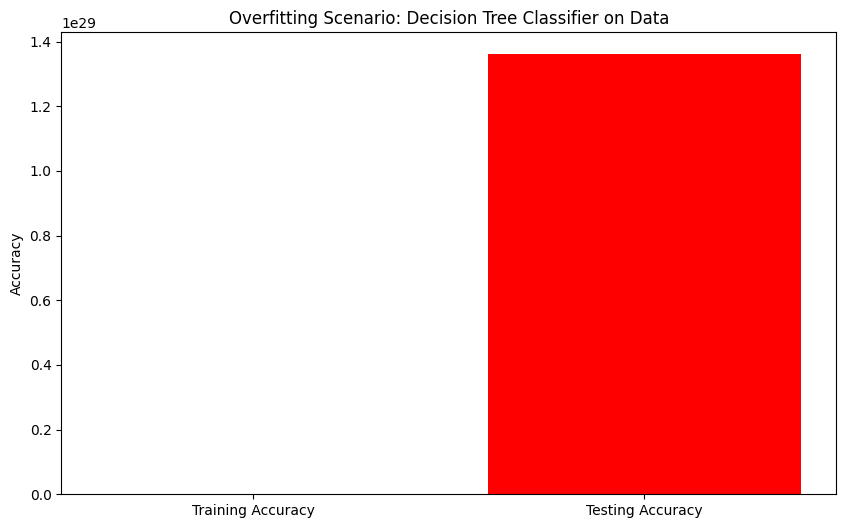

In [257]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [mse_train, mse_test], color=['blue', 'red'])
plt.ylabel('Accuracy')
plt.title('Overfitting Scenario: Decision Tree Classifier on Data')
plt.show()

## RIDGE AND LASSO REGULARIZATION

In [240]:
# Building pipelines for Ridge and Lasso regression with regularization
pipeline_ridge = Pipeline([
    ('transformer', ct),
    ('poly', poly),
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=1))
])

pipeline_lasso = Pipeline([
    ('transformer', ct),
    ('poly', poly),
    ('scaler', StandardScaler()),
    ('regressor', Lasso(alpha=0.1, max_iter=10000))
])


In [241]:

# Fit and predict using Ridge regression
pipeline_ridge.fit(X_train, y_train)
y_train_pred_ridge = pipeline_ridge.predict(X_train)
y_test_pred_ridge = pipeline_ridge.predict(X_test)

# Fit and predict using Lasso regression
pipeline_lasso.fit(X_train, y_train)
y_train_pred_lasso = pipeline_lasso.predict(X_train)
y_test_pred_lasso = pipeline_lasso.predict(X_test)

# Calculate MSE for Ridge regression
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)

# Calculate MSE for Lasso regression
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)

mse_train_ridge, mse_test_ridge, mse_train_lasso, mse_test_lasso


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.915e+12, tolerance: 1.197e+11
  model = cd_fast.enet_coordinate_descent(


(60853138035.97432, 9360234592748.99, 25728284112.777435, 37872978110298.375)

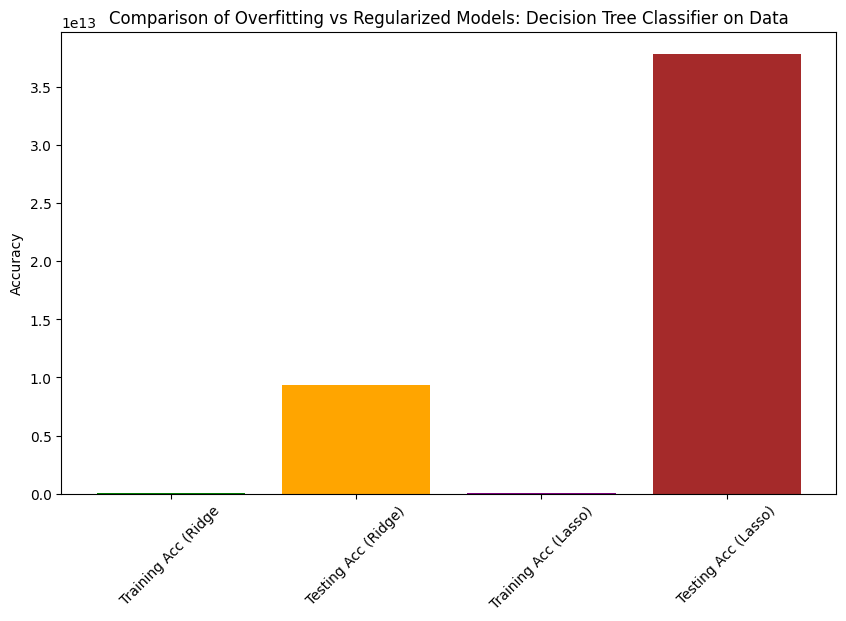

In [258]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(['Training Acc (Ridge', 'Testing Acc (Ridge)', 'Training Acc (Lasso)', 'Testing Acc (Lasso)'],
        [mse_train_ridge, mse_test_ridge, mse_train_lasso, mse_test_lasso],
        color=['green', 'orange', 'purple', 'brown'])
plt.ylabel('Accuracy')
plt.title('Comparison of Overfitting vs Regularized Models: Decision Tree Classifier on Data')
plt.xticks(rotation=45)
plt.show()

## OVERFITTING, RIDGE AND LASSO REGULARIZATION (CLASSIFICATION)**

## MUSIC DATASET

## OVERFITTING SCENARIO

In [242]:
from sklearn.tree import DecisionTreeClassifier

# Preprocessing
# Encoding the categorical target variable
le = LabelEncoder()
df2['label'] = le.fit_transform(df2['label'])

# Separating features and target variable
X_class = df2.drop(['filename', 'label'], axis=1)
y_class = df2['label']

# Splitting the dataset into a smaller training set and a testing set to create overfitting
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.8, random_state=42)

# Creating a Decision Tree Classifier with maximum depth to induce overfitting
dt_overfit = DecisionTreeClassifier(max_depth=None)

# Fit the model
dt_overfit.fit(X_train_class, y_train_class)

# Predict on training and testing data
y_train_pred_class = dt_overfit.predict(X_train_class)
y_test_pred_class = dt_overfit.predict(X_test_class)

# Calculate and print the accuracy for training and testing sets
acc_train_class = accuracy_score(y_train_class, y_train_pred_class)
acc_test_class = accuracy_score(y_test_class, y_test_pred_class)

acc_train_class, acc_test_class

(1.0, 0.41125)

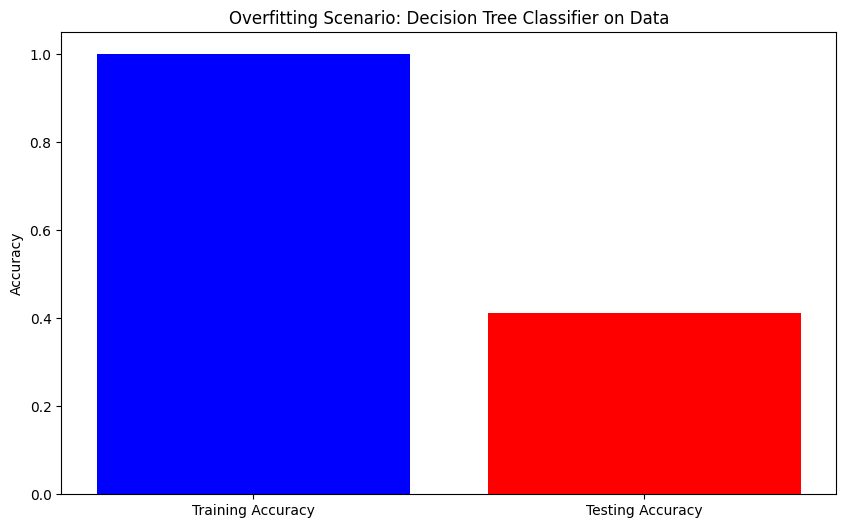

In [254]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [acc_train_class, acc_test_class], color=['blue', 'red'])
plt.ylabel('Accuracy')
plt.title('Overfitting Scenario: Decision Tree Classifier on Data')
plt.show()

## **REGULARIZATION METHODS**

In [243]:
# Regularization Method 1: Limiting the Maximum Depth of the Decision Tree
dt_regularized_depth = DecisionTreeClassifier(max_depth=3)  # Limiting depth to 3

# Regularization Method 2: Pruning the Tree using min_samples_split
dt_regularized_prune = DecisionTreeClassifier(min_samples_split=10)  # Minimum number of samples required to split a node

# Fit and predict using the regularized models
dt_regularized_depth.fit(X_train_class, y_train_class)
y_train_pred_depth = dt_regularized_depth.predict(X_train_class)
y_test_pred_depth = dt_regularized_depth.predict(X_test_class)

dt_regularized_prune.fit(X_train_class, y_train_class)
y_train_pred_prune = dt_regularized_prune.predict(X_train_class)
y_test_pred_prune = dt_regularized_prune.predict(X_test_class)

# Calculate accuracies for the regularized models
acc_train_depth = accuracy_score(y_train_class, y_train_pred_depth)
acc_test_depth = accuracy_score(y_test_class, y_test_pred_depth)

acc_train_prune = accuracy_score(y_train_class, y_train_pred_prune)
acc_test_prune = accuracy_score(y_test_class, y_test_pred_prune)

acc_train_depth, acc_test_depth, acc_train_prune, acc_test_prune


(0.435, 0.35875, 0.805, 0.4025)

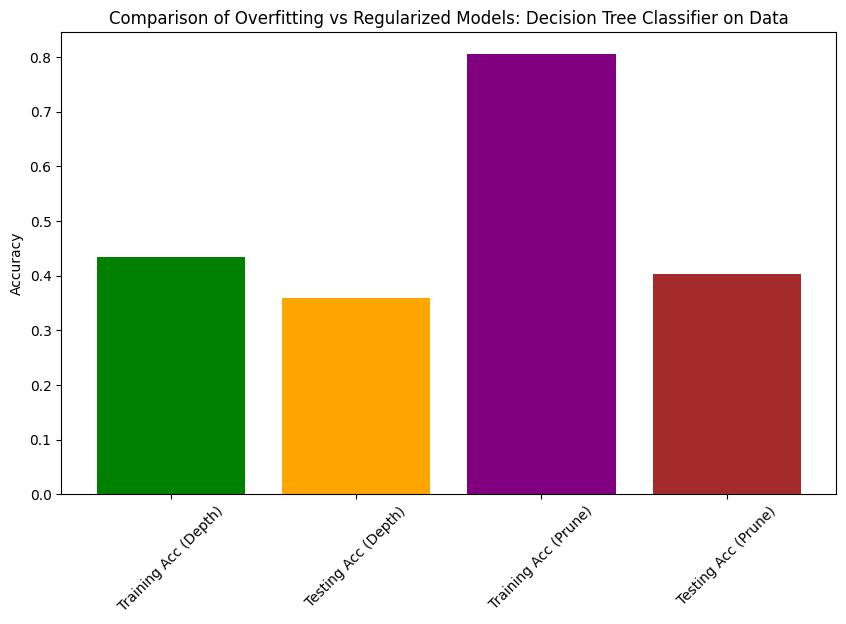

In [256]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(['Training Acc (Depth)', 'Testing Acc (Depth)', 'Training Acc (Prune)', 'Testing Acc (Prune)'],
        [acc_train_depth, acc_test_depth, acc_train_prune, acc_test_prune],
        color=['green', 'orange', 'purple', 'brown'])
plt.ylabel('Accuracy')
plt.title('Comparison of Overfitting vs Regularized Models: Decision Tree Classifier on Data')
plt.xticks(rotation=45)
plt.show()

##**8. DECISION TREE WITH AND WITHOUT PRUNING**

##WINE DATASET

In [262]:
# Separating features and target variable
X = new_df4.drop('class', axis=1)
y = new_df4['class']

# Splitting the data into training and testing sets
X_train_wine_dt, X_test_wine_dt, y_train_wine_dt, y_test_wine_dt = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying Decision Tree Classifier without pruning
dt_no_prune = DecisionTreeClassifier(max_depth=None)
dt_no_prune.fit(X_train_wine_dt, y_train_wine_dt)
y_pred_no_prune_train = dt_no_prune.predict(X_train_wine_dt)
y_pred_no_prune_test = dt_no_prune.predict(X_test_wine_dt)

# Applying Decision Tree Classifier with pruning (using min_samples_split)
dt_prune = DecisionTreeClassifier(min_samples_split=4)  # Pruning parameter
dt_prune.fit(X_train_wine_dt, y_train_wine_dt)
y_pred_prune_train = dt_prune.predict(X_train_wine_dt)
y_pred_prune_test = dt_prune.predict(X_test_wine_dt)

# Calculate accuracies
no_prune_train = accuracy_score(y_train_wine_dt, y_pred_no_prune_train)
no_prune_test = accuracy_score(y_test_wine_dt, y_pred_no_prune_test)

prune_train = accuracy_score(y_train_wine_dt, y_pred_prune_train)
prune_test = accuracy_score(y_test_wine_dt, y_pred_prune_test)

no_prune_train, no_prune_test, prune_train, prune_test


(1.0, 0.9444444444444444, 1.0, 0.9629629629629629)

## MASTER PHONESMART DATASET

In [ ]:
# Encode categorical variables using LabelEncoder
encoder = LabelEncoder()
df4['Device'] = encoder.fit_transform(df4['Device'])

# Scale the numerical features to standardize them
scaler = StandardScaler()
numerical_features = df4.drop(['Year', 'Device'], axis=1)  # Replace with your numerical features columns
scaled_features = scaler.fit_transform(numerical_features)


In [264]:
# Define your features and target variable
X = scaled_features  # Features
y = df4['Device']  # Target variable

# Splitting the data into training and testing sets
X_train_wine_dt, X_test_wine_dt, y_train_wine_dt, y_test_wine_dt = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying Decision Tree Classifier without pruning
dt_no_prune = DecisionTreeClassifier(max_depth=None)
dt_no_prune.fit(X_train_wine_dt, y_train_wine_dt)
y_pred_no_prune_train = dt_no_prune.predict(X_train_wine_dt)
y_pred_no_prune_test = dt_no_prune.predict(X_test_wine_dt)

# Applying Decision Tree Classifier with pruning (using min_samples_split)
dt_prune = DecisionTreeClassifier(min_samples_split=4)  # Pruning parameter
dt_prune.fit(X_train_wine_dt, y_train_wine_dt)
y_pred_prune_train = dt_prune.predict(X_train_wine_dt)
y_pred_prune_test = dt_prune.predict(X_test_wine_dt)

# Calculate accuracies
no_prune_train = accuracy_score(y_train_wine_dt, y_pred_no_prune_train)
no_prune_test = accuracy_score(y_test_wine_dt, y_pred_no_prune_test)

prune_train = accuracy_score(y_train_wine_dt, y_pred_prune_train)
prune_test = accuracy_score(y_test_wine_dt, y_pred_prune_test)

no_prune_train, no_prune_test, prune_train, prune_test

(1.0, 0.7151515151515152, 0.9738903394255874, 0.6909090909090909)